# Homework 5

**Before you start:** Read Chapter 8 Naive Bayes and Chapter 9 Decision Trees in the textbook.

**Note:** Please enter the code along with your comments in the **TODO** section.

Alternative solutions are always welcomed.

### **Problem 1** (40 points)##

In this problem, we need to build a Naive Bayes model to classify whether a movie review is positive or negative. 

The given data is a subset of [the IMDB movie review dataset](https://www.kaggle.com/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews).

This might be your first time working with text mining. Therefore, the basic pre-processing steps are given below. 

**You have two major tasks:**

* Go through the code and get to know the purpose of each preprocessing step. Summarize what a preprocessing step does when required.
* Build a multinomial Naive Bayes model to classify the reviews.

In [83]:
#Standard Library Imports
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn import neighbors
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse
from sklearn.metrics import *
from numpy import mean
from numpy import absolute
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
import graphviz 
from sklearn.model_selection import GridSearchCV
from tabulate import tabulate
from sklearn.tree import export_graphviz

In [84]:
# Import the dataset
import pandas as pd
df = pd.read_csv("IMDB Dataset_subset.csv")
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [85]:
# Packages required for preprocessing #
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import WordNetLemmatizer #for lemmatization
import re #regular expression package
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mahesh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/mahesh/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [87]:
X = [row for row in df['review']] #list of reviews
classes = df['sentiment'] #list of true classes
y = classes

In [88]:
# Pre-process the data
reviews = []
lemmatizer = WordNetLemmatizer() 

for review in range(0, len(X)):
    # part 1
    review = re.sub(r'[\W_]', ' ', str(X[review])) 
    review = re.sub(r'\s+[a-zA-Z]\s+', ' ', review) 
    review = re.sub(r'\^[a-zA-Z]\s+', ' ', review) 
    review = re.sub(r'\s+', ' ', review, flags=re.I) 
    review = re.sub(r'^b\s+', '', review) # if a review record is in bytes, the corresponding line will have a letter 'b' appended at the start)
    review = review.lower()
    review = re.sub(r'[0-9]+', '', review) 

    # part 2
    review = review.split()
    review = [lemmatizer.lemmatize(word) for word in review]
    review = ' '.join(review)

    reviews.append(review)


**TODO 1**

Explain the function that part 1 and part 2 achieve in the loop.

We used the re.sub function in part 1 to replace all occurrences of the RE pattern in a string with repl, substituting all occurrences unless max is specified. This method returns a string that has been changed. We're attempting to create a modified string so that we can apply machine learning models to it. The first expression removes all non-word characters and the underscore (_) from reviews. The second expression removes a single whitespace character, then a group of capital and lowercase characters, and finally white spaces. In review, the third expression removes the string that begins with uppercase or lowercase characters and ends with multiple white spaces. Multiple white spaces are removed with the fourth expression. The Lasr expression is used to eliminate a set of numeric values from a set of reviews.

To make the analysis easier, the string in review is separated into a list of strings in part 2. The Lemmatizer function collects all of a word's inflected forms into a single object that may be studied. We are attempting to break the string into a list of strings and then using the lemmatizer function to remove the repetitive words in this section. Spaces are used to separate the final string.

In [90]:
# Continue with pre-processing
vectorizer = CountVectorizer(stop_words = "english", max_df=0.7, min_df=5) 
texts = vectorizer.fit_transform(reviews).toarray()  
vocab = vectorizer.vocabulary_ 
vocab = sorted(vocab.items(), key = lambda x: x[1])
vocab = [v[0] for v in vocab]


**TODO 2**

What do "texts" and "vocab" represent? What is the relationship between them?

Fit transform learns the vocabulary dictionary and returns the tokens in a document-term matrix in 'texts'. The count of each word in the sentence is one of the qualities. This matrix is subsequently transformed into a two-dimensional array.

All of the words that have been vectorized and sorted in ascending order make up 'vocab.'

**TODO 3**

Partition the data into 80% training and 20% validation set.

In [91]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, classes, test_size=0.2)

**TODO 4**

Build a multinomial Naive Bayes model on the training set.

In [92]:
# learn training data vocabulary, then use it to create a document-term matrix

# 3. fit
vect = CountVectorizer()
vect.fit(X_train)

# 4. transform training data
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)
X_test_dtm

<800x31467 sparse matrix of type '<class 'numpy.int64'>'
	with 107761 stored elements in Compressed Sparse Row format>

In [93]:
# 1. import
from sklearn.naive_bayes import MultinomialNB

# 2. instantiate a Multinomial Naive Bayes model
nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)

MultinomialNB()

In [94]:
# 4. makeing a  class predictions for X_test_dtm
y_pred_class = nb.predict(X_test_dtm)
y_pred_class

array(['negative', 'positive', 'positive', 'negative', 'positive',
       'positive', 'negative', 'positive', 'negative', 'negative',
       'positive', 'negative', 'negative', 'negative', 'positive',
       'positive', 'positive', 'negative', 'negative', 'negative',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'negative', 'positive', 'negative', 'positive', 'negative',
       'positive', 'negative', 'negative', 'positive', 'positive',
       'positive', 'positive', 'negative', 'positive', 'positive',
       'negative', 'positive', 'negative', 'negative', 'negative',
       'negative', 'positive', 'positive', 'positive', 'positive',
       'positive', 'positive', 'negative', 'positive', 'positive',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'negative', 'positive', 'positive', 'negative', 'negative',
       'negative', 'negative', 'positive', 'positive', 'negative',
       'negative', 'positive', 'positive', 'negative', 'positi

In [95]:
#calculate accuracy of class predictions
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)

0.81875

In [97]:
# calculate predicted probabilities for X_test_dtm (poorly calibrated)

# Numpy Array with 2C
# left Column: probability class 0
# right Column: probability class 1
# we only need the right column 
y_pred_prob = nb.predict_proba(X_test_dtm)[:, 1]
y_pred_prob

# Naive Bayes predicts very extreme probabilites, we should not take them at face value

array([6.16761132e-15, 9.99999973e-01, 9.99999977e-01, 2.08908486e-01,
       1.00000000e+00, 1.00000000e+00, 1.31258014e-03, 9.99997098e-01,
       9.42833115e-02, 6.71397377e-20, 8.67425726e-01, 4.73894946e-06,
       8.96199999e-03, 3.12891187e-18, 1.00000000e+00, 9.99999354e-01,
       9.99912085e-01, 2.42017494e-03, 7.70607812e-09, 1.72464365e-02,
       9.58237738e-10, 3.18952517e-10, 3.04422394e-04, 2.66499281e-15,
       1.80018376e-15, 2.75553985e-07, 9.99997267e-01, 2.44009524e-02,
       9.99051723e-01, 3.72332826e-09, 1.00000000e+00, 2.03728885e-09,
       3.52170422e-02, 9.99999993e-01, 1.00000000e+00, 9.98691062e-01,
       9.99999949e-01, 1.80316811e-11, 9.97737964e-01, 9.99703907e-01,
       6.69598376e-04, 9.99998302e-01, 5.57439645e-02, 6.33615212e-12,
       3.01349709e-01, 3.04472540e-05, 9.99487292e-01, 1.00000000e+00,
       9.99985660e-01, 1.00000000e+00, 9.95093050e-01, 1.00000000e+00,
       1.08366093e-14, 9.99947086e-01, 9.99922030e-01, 8.94626048e-12,
      

In [98]:
# calculate AUC
metrics.roc_auc_score(y_test, y_pred_prob)

0.9011931324570777

**Hint:** [Multinomial Naive Bayes with sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html)

**TODO 5**

Evaluate the model performance with the training and validation set. Comment on the model performance.

In [99]:
clas_report=classification_report(y_test,y_pred_class,target_names=['Positive','Negative'])
print(clas_report)

              precision    recall  f1-score   support

    Positive       0.79      0.87      0.83       401
    Negative       0.85      0.77      0.81       399

    accuracy                           0.82       800
   macro avg       0.82      0.82      0.82       800
weighted avg       0.82      0.82      0.82       800



**Hint:** [Classification report with sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)

**If you are interested (this part is not graded):**

Explore one or two records that were misclassified. Check the original text, vectorized text, and comment on the possible reason why the record got misclassified.

In [100]:
import numpy as np

y_test=np.asarray(y_test)

for i in range(0, len(y_test)):
  if(y_test[i]!=y_pred_class[i]):
    print(reviews[i],'\n')
    print(y_test[i],'\n')
    print(y_pred_class[i],'\n')

basically there a family where little boy jake think there a zombie in his closet his parent are fighting all the time br br this movie is slower than soap opera and suddenly jake decides to become rambo and kill the zombie br br ok first of all when you re going to make film you must decide if it thriller or drama a drama the movie is watchable parent are divorcing arguing like in real life and then we have jake with his closet which totally ruin all the film expected to see boogeyman similar movie and instead watched drama with some meaningless thriller spot br br out of just for the well playing parent descent dialog a for the shot with jake just ignore them 

positive 

negative 

probably my all time favorite movie story of selflessness sacrifice and dedication to noble cause but it not preachy or boring it just never get old despite my having seen it some or more time in the last year paul lukas performance brings tear to my eye and bette davis in one of her very few truly sympat

### **Problem 2** (40 points)##

The wine dataset is the result of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. (For illustration simplicity purpose, only 2 classes, 0 and 1, will be included for the classification task.) The analysis determined the quantities of 13 constituents found in each of the three types of wines.

The objective is to classify the wines into class 0 or 1 using the 13 given attributes and a decision tree classifier.

In [101]:
from sklearn import datasets
import pandas as pd

# load the wine dataset 
wine = datasets.load_wine()
print(wine.DESCR)

# convert the data into dataframe format
X = pd.DataFrame(wine['data'], columns = wine['feature_names'])
y = wine['target']

# only consider wine class 0 and 1
X = X.loc[0:129, :]
y = y[0:130]

X.head()

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


**TODO 1**

Partition the data into 70% training and 30% validation set.

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size= 0.3, random_state=42)
X_train

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
22,13.71,1.86,2.36,16.6,101.0,2.61,2.88,0.27,1.69,3.80,1.11,4.00,1035.0
44,13.05,1.77,2.10,17.0,107.0,3.00,3.00,0.28,2.03,5.04,0.88,3.35,885.0
65,12.37,1.21,2.56,18.1,98.0,2.42,2.65,0.37,2.08,4.60,1.19,2.30,678.0
96,11.81,2.12,2.74,21.5,134.0,1.60,0.99,0.14,1.56,2.50,0.95,2.26,625.0
30,13.73,1.50,2.70,22.5,101.0,3.00,3.25,0.29,2.38,5.70,1.19,2.71,1285.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,13.86,1.51,2.67,25.0,86.0,2.95,2.86,0.21,1.87,3.38,1.36,3.16,410.0
106,12.25,1.73,2.12,19.0,80.0,1.65,2.03,0.37,1.63,3.40,1.00,3.17,510.0
14,14.38,1.87,2.38,12.0,102.0,3.30,3.64,0.29,2.96,7.50,1.20,3.00,1547.0
92,12.69,1.53,2.26,20.7,80.0,1.38,1.46,0.58,1.62,3.05,0.96,2.06,495.0


**TODO 2**

Fit a decision tree classifier on the training set with no pruning.

Plot the tree with the following requirements:


*   The node with splitting rule should contain variable name instead of variable index.
*   Pick the appropriate information to present in the node. The node should be of appropriate size so the information is clear for viewing.
*   The node should be colored.



Accuracy: 0.9743589743589743


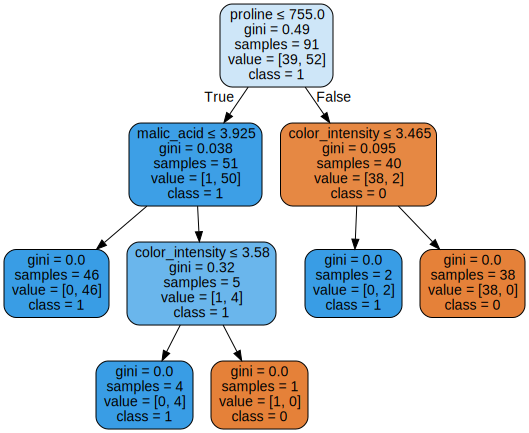

In [103]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
pred = model.predict(X_test)
print('Accuracy:', accuracy_score(y_test,pred))
dot_data = tree.export_graphviz(model,out_file=None, feature_names=X_train.columns,class_names=['0','1'],filled=True, rounded=True,special_characters=True)
graph = graphviz.Source(dot_data)
graph


**Hint:** [Decision tree classifier with sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

**TODO 3**

Prune the tree with cost complexity. What is the best ccp value? Use visualization to back up your decision. 

Plot the pruned tree in the same manner as TODO 2.

In [104]:
model_2 = DecisionTreeClassifier()
model_2.fit(X_train,y_train)
pred = model_2.predict(X_test)
print('Accuracy:', accuracy_score(y_test,pred))
#cost_complexity_pruning_path will give the effective alphas of subtrees during pruning and it corresponds to impurities.
path = model_2.cost_complexity_pruning_path(X_train,y_train)
# We have set the values of alpha and pass it to the ccp_alpha parameter of our DecisionTreeClassifier.
alphas = path['ccp_alphas']
alphas

Accuracy: 0.9743589743589743


array([0.        , 0.01077354, 0.04175824, 0.4264906 ])

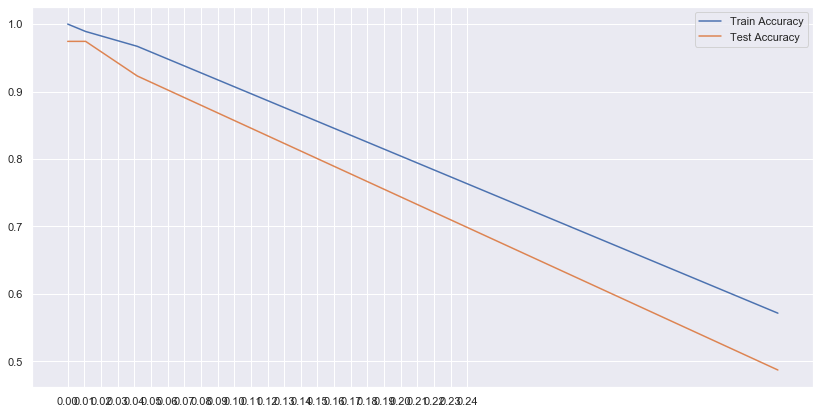

In [107]:
# By looping over the alphas array, we will find the accuracy on both Train and Test parts of our dataset.

ccp_val = 1
df_alpha = pd.DataFrame(columns = ['Alpha', 'Accuracy'])
accuracy_train, accuracy_test=[],[]

for i in alphas:
  tree = DecisionTreeClassifier(ccp_alpha=i)
  tree.fit(X_train,y_train)
  y_train_pred = tree.predict(X_train)
  y_test_pred=tree.predict(X_test)
  df_alpha.loc[ccp_val] = [i, accuracy_score(y_test, y_test_pred)]
  ccp_val+=1

  accuracy_train.append(accuracy_score(y_train,y_train_pred))
  accuracy_test.append(accuracy_score(y_test,y_test_pred))

sns.set()
plt.figure(figsize=(14,7))
sns.lineplot(y=accuracy_train, x= alphas, label ="Train Accuracy")
sns.lineplot(y=accuracy_test, x= alphas, label ="Test Accuracy")
#plt.xticks(ticks = np.arange(0.00,0.25,0.01))
plt.show()


In [108]:
df_alpha

,Alpha,Accuracy
1,0.000000,0.974359
2,0.010774,0.974359
3,0.041758,0.923077
4,0.426491,0.487179


In [109]:
# Finding the best ccp value

print('Best performing model')      
print(tabulate(df_alpha[df_alpha['Accuracy']==df_alpha['Accuracy'].max()], headers = 'keys', tablefmt = 'psql'))



Best performing model
+----+-----------+------------+
|    |     Alpha |   Accuracy |
|----+-----------+------------|
|  1 | 0         |   0.974359 |
|  2 | 0.0107735 |   0.974359 |
+----+-----------+------------+


In [110]:
from sklearn.metrics import accuracy_score
tree = DecisionTreeClassifier(ccp_alpha= 0.0107735, random_state=40)
tree.fit(X_train,y_train)
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

print(accuracy_score(y_train,y_train_pred),accuracy_score(y_test,y_test_pred))

1.0 0.9743589743589743


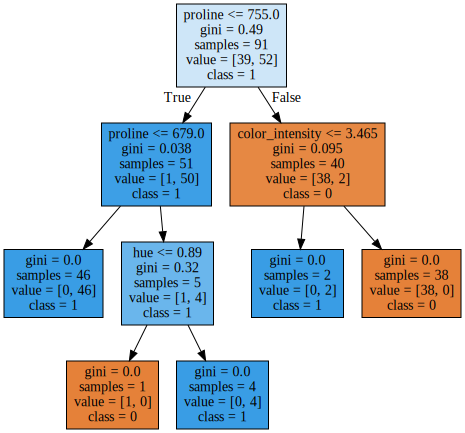

In [80]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
import graphviz
import collections
import pydotplus

dot_data = tree.export_graphviz(model_2,out_file=None, feature_names=X_train.columns,class_names=['0','1'],filled= True)
graph = graphviz.Source(dot_data)
graph


**Hint:** [Minimal cost complexity pruning](https://scikit-learn.org/stable/modules/tree.html#minimal-cost-complexity-pruning)

[Post pruning decision trees with cost complexity with sklearn](https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html#sphx-glr-auto-examples-tree-plot-cost-complexity-pruning-py)

### **Problem 3** (20 points)##

Answer the following short answer questions and back up your answer with explanations and/or examples.

**TODO 1**

What type of input and response variables can a Naive Bayes classifier handle? 

What kind of dataset is ideal for applying the Naive Bayes classifier?

1) As input variables, you can choose from a variety of numeric and category options. The categorical nature of the response variable is expected. It is numerical, and it assumes that the values are classified into discrete groups. Only a few unique values are allowed for the target variable (preferably maximum 4).

2) Gaussian Naive Bayes only supports continuously valued features, whereas standard Naive Bayes only supports categorical features. Standard Naive Bayes is the superior choice if our data set's features are categorical. Gaussian Naive Bayes may be preferable if the characteristics in our data set are continuous. We have two alternatives if our data collection comprises both categorical and continuous variables. We can either discretize the continuous features via bucketing or a similar methodology, or we can use a hybrid Naive Bayes model.

**TODO 2**

What are the pros and cons of a Naive Bayes classifier comparing to other classfiers we learnt in class?

Pros:

* The Naive Bayes classifier performs well when the dataset has multiple independent attributes.
* Because Naive Bayes only needs a limited quantity of training data to work on test data, it takes less time to train.
* Noise Resilience and Computationally Efficient
* Simple and computationally efficient

Cons:

* Sometimes the value of a test record does not match the training data. This is problematic since it allocates a chance of 0 for an answer.
* No Regression is possible 
* In order to use Naive Bayes, you'll need mutually independent predictors that are 100 percent independent, which are hard to come by in real life.
* Limited Application Case

**TODO 3**

What type of input and response variables can a decision tree model handle? 

What kind of dataset is ideal for applying the decision tree model?

Discuss the classification tree and regression tree separately if necessary.

 1) The Decision Tree Model is capable of handling a variety of data kinds, including continuous, categorical, ordinal, and binary data. The data does not need to be transformed.

 2) Non-linear data sets are effectively handled with decision trees.

 3)The main distinction between classification and regression decision trees is that classification decision trees are formed using unordered values and dependent variables, whereas regression decision trees are built with ordered values and dependent variables. Ordered values are combined with continuous values in the regression decision trees.

**TODO 4**

What are the pros and cons of a decision tree model comparing to other models we learnt in class?

Pros:

* Decision trees are simple to learn and use.
* Doesn't require normalization.
* Easy Data Preperation.
* Missing values does not affect the decision tree algorithm considerably. 
* Not sensitive to scale differences.

Cons:

* Because decision trees take a long time to train, they are relatively expensive. 
* Inadequate prediction powers.
* When it comes to predicting continuous values, the decision tree isn't particularly well.

**TODO 5**

Between the Naive Bayes classifier and the classification tree, which one is more prone to overfitting the training data? 

Although Decision Trees are very versatile, interpretable, and operate well with classification and regression issues, when gini values are zero, they tend to overfit the training data more. As a result, we use additional tree-pruning strategies.

The Naive Bayes Classifier is a simple and computationally efficient algorithm that doesn't overfit nearly as much as other methods, obviating the need for network pruning or processing.
 